# Philadelphia Crime Data

## Ten Years of Crime Data, by OpenDataPhilly
#### https://www.kaggle.com/mchirico/philadelphiacrimedata

## Imports

In [138]:
import pandas as pd 
import numpy as np
import pixiedust
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from pathlib import Path
import seaborn as sns 
sns.set()

## Read csv files

In [139]:
data_folder = Path("philadelphia-data/")

crimes = pd.read_csv(data_folder / 'crime.csv', error_bad_lines=False)

crimes.head(2)

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN


In [140]:
# View all columns and data types
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
Dc_Dist               int64
Psa                   object
Dispatch_Date_Time    object
Dispatch_Date         object
Dispatch_Time         object
Hour                  int64
Dc_Key                int64
Location_Block        object
UCR_General           float64
Text_General_Code     object
Police_Districts      float64
Month                 object
Lon                   float64
Lat                   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


##### DC_Dist	- District	- A two character field that names the District boundary.	- Text
##### DC_Key	- DC Number	- The unique identifier of the crime that consists of Year + District + Unique ID.	- Text
##### Dispatch_Date_Time	- Dispatch Date/Time	The date and time that the officer was dispatched to the scene.	- Date/Time
##### Hour	 	- The generalized hour of the dispatched time.	- Date/Time
##### Location_Block	- Location Block	- The location of crime generalized by street block.	- Text
##### Sector	- PSA	- A single character field that names the Police Service Area boundary.	- Text
##### Text_General_Code	- General Crime Category	- The generalized text for the crime code.	- Text
##### UCR_General	- UCR Code	- The rounded crime code, i.e. 614 to 600		- Numeric

## Value Counts for Locations
#### Use Police_District as location value as it is the lowest value count.

In [141]:
# Dc_Dist
print('Dc_Dist: ', crimes["Dc_Dist"].value_counts().size)
print()

# Police_Districts
print('Police_Districts: ', crimes["Police_Districts"].value_counts().size)
print()

# Psa
print('Psa: ', crimes["Psa"].value_counts().size)

Dc_Dist:  25

Police_Districts:  22

Psa:  30


## View 'Police_Districts'

In [142]:
# Police_Districts
print('Unique values of Police_Districts: ', crimes["Police_Districts"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Police_Districts').size().sort_values()

Unique values of Police_Districts:  22



Police_Districts
22.0      2818
4.0      31113
6.0      44444
1.0      48008
12.0     72198
7.0      73207
13.0     74514
8.0      83426
19.0     87183
5.0      96025
21.0     96956
14.0    109907
3.0     114689
2.0     116180
10.0    120481
20.0    130293
9.0     132875
15.0    135628
18.0    150186
16.0    153103
17.0    161245
11.0    183196
dtype: int64

## Remove duplicates and view data

In [143]:
print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['Dc_Key'], keep='first', inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

crimes.head(2)

Dataset ready..
Dataset Shape before drop_duplicate :  (2237605, 14)
Dataset Shape after drop_duplicate:  (2237605, 14)


,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN


## Columns

In [144]:
crimes.columns

Index(['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat'],
      dtype='object')

## Create a new dataframe including Lon and Lat (In case we need it)

In [145]:
# crimes_lon_lat = crimes
# crimes_lon_lat.head(1)

## Drop unwanted columns 

In [146]:
crimes.drop(['Dc_Dist', 'Psa', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Location_Block', 'UCR_General', 'Lon', 'Lat', 'Month'], inplace=True, axis=1)
crimes.columns

Index(['Dispatch_Date_Time', 'Dc_Key', 'Text_General_Code',
       'Police_Districts'],
      dtype='object')

In [147]:
crimes.head(2)

,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts
0,2009-10-02 14:24:00,200918067518,Other Assaults,NaN
1,2009-05-10 00:55:00,200914033994,All Other Offenses,NaN


## Count column - Type of crime 

In [148]:
# Text_General_Code
print('Unique values of Text_General_Code: ', crimes["Text_General_Code"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Text_General_Code').size().sort_values()

Unique values of Text_General_Code:  33



Text_General_Code
Homicide - Gross Negligence                    12
Homicide - Justifiable                         42
Receiving Stolen Property                     786
Gambling Violations                           921
Offenses Against Family and Children         1794
Homicide - Criminal                          3442
Public Drunkenness                           4619
Embezzlement                                 4807
Forgery and Counterfeiting                   4843
Liquor Law Violations                        5439
Arson                                        5684
Vagrancy/Loitering                           6776
Rape                                        11852
Prostitution and Commercialized Vice        12854
Other Sex Offenses (Not Commercialized)     15304
Weapon Violations                           19092
Burglary Non-Residential                    23276
Aggravated Assault Firearm                  27934
Disorderly Conduct                          40137
Robbery Firearm                 

## Drop rows where 'Text_General_Code' = 'All Other Offenses'

In [149]:
print('Dataset Shape before drop : ', crimes.shape)
crimes = crimes[crimes['Text_General_Code'] != 'All Other Offenses']
print('Dataset Shape after drop: ', crimes.shape)

Dataset Shape before drop :  (2237605, 4)
Dataset Shape after drop:  (1800024, 4)


## Find any columns that have NaN values

In [150]:
crimes.isnull().any()

Dispatch_Date_Time    False
Dc_Key                False
Text_General_Code      True
Police_Districts       True
dtype: bool

## Drop null values in 'Text_General_Code' column

In [151]:
print('Shape before: ',crimes.shape)
print()
print('Rows with NaN entries before')
print('Text_General_Code: ',crimes['Text_General_Code'].isnull().sum())
crimes.dropna(inplace = True)
print()
print('Rows with NaN entries after')
print('Text_General_Code: ',crimes['Text_General_Code'].isnull().sum())
print()
print('Shape after: ',crimes.shape)

Shape before:  (1800024, 4)

Rows with NaN entries before
Text_General_Code:  663

Rows with NaN entries after
Text_General_Code:  0

Shape after:  (1782686, 4)


## Drop null values in 'Police_Districts' column

In [152]:
print('Shape before: ',crimes.shape)
print()
print('Rows with NaN entries before')
print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
crimes.dropna(inplace = True)
print()
print('Rows with NaN entries after')
print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
print()
print('Shape after: ',crimes.shape)

Shape before:  (1782686, 4)

Rows with NaN entries before
Police_Districts:  0

Rows with NaN entries after
Police_Districts:  0

Shape after:  (1782686, 4)


## Find which columns that have NaN values

In [153]:
crimes.isnull().any()

Dispatch_Date_Time    False
Dc_Key                False
Text_General_Code     False
Police_Districts      False
dtype: bool

In [154]:
crimes.head(2)

,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts
3,2009-07-19 01:09:00,200935061008,Weapon Violations,20.0
5,2015-04-25 12:50:00,201517017705,Thefts,13.0


## Convert dates to Pandas datetime format

In [155]:
crimes['Dispatch_Date_Time'] = pd.to_datetime(crimes['Dispatch_Date_Time'], format='%Y-%m-%d %H:%M:%S')
crimes.head(2)

,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts
3,2009-07-19 01:09:00,200935061008,Weapon Violations,20.0
5,2015-04-25 12:50:00,201517017705,Thefts,13.0


## Add extra 'month', 'day', 'weekday' and 'hour' columns

In [156]:
crimes['month'] = crimes['Dispatch_Date_Time'].dt.month
crimes['day'] = crimes['Dispatch_Date_Time'].dt.day
crimes['weekday'] = crimes['Dispatch_Date_Time'].dt.weekday
crimes['hour'] = crimes['Dispatch_Date_Time'].dt.hour
crimes.head(2)

,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts,month,day,weekday,hour
3,2009-07-19 01:09:00,200935061008,Weapon Violations,20.0,7,19,6,1
5,2015-04-25 12:50:00,201517017705,Thefts,13.0,4,25,5,12


## Set the index to be the date

In [157]:
crimes.index = pd.DatetimeIndex(crimes['Dispatch_Date_Time'])

## View data

In [158]:
print("Shape: ",crimes.shape)
crimes.head(2)

Shape:  (1782686, 8)


,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts,month,day,weekday,hour
Dispatch_Date_Time,,,,,,,,
2009-07-19 01:09:00,2009-07-19 01:09:00,200935061008,Weapon Violations,20.0,7,19,6,1
2015-04-25 12:50:00,2015-04-25 12:50:00,201517017705,Thefts,13.0,4,25,5,12


## View columns and data types

In [159]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1782686 entries, 2009-07-19 01:09:00 to 2017-01-17 16:20:00
Data columns (total 8 columns):
Dispatch_Date_Time    datetime64[ns]
Dc_Key                int64
Text_General_Code     object
Police_Districts      float64
month                 int64
day                   int64
weekday               int64
hour                  int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 122.4+ MB


## Keep the most frequent Location Descriptions

In [160]:
# loc_to_change  = list(crimes['Location_Block'].value_counts()[20:].index)
# block_to_change = list(crimes['Police_Districts'].value_counts()[20:].index)
# type_to_change = list(crimes['Text_General_Code'].value_counts()[20:].index)

# crimes.loc[crimes['Location_Block'].isin(loc_to_change) , crimes.columns=='Location_Block'] = 'OTHER'
# crimes.loc[crimes['Police_Districts'].isin(block_to_change) , crimes.columns=='Police_Districts'] = 'OTHER'
# crimes.loc[crimes['Text_General_Code'].isin(type_to_change) , crimes.columns=='Text_General_Code'] = 'OTHER'

## Convert certain columns into 'Categorical' types

In [161]:
# crimes['Text_General_Code'] = pd.Categorical(crimes['Text_General_Code'])
# crimes['Location_Block'] = pd.Categorical(crimes['Location_Block'])
# crimes['Police_Districts'] = pd.Categorical(crimes['Police_Districts'])

# crimes.info()

## Plot Crimes per Month

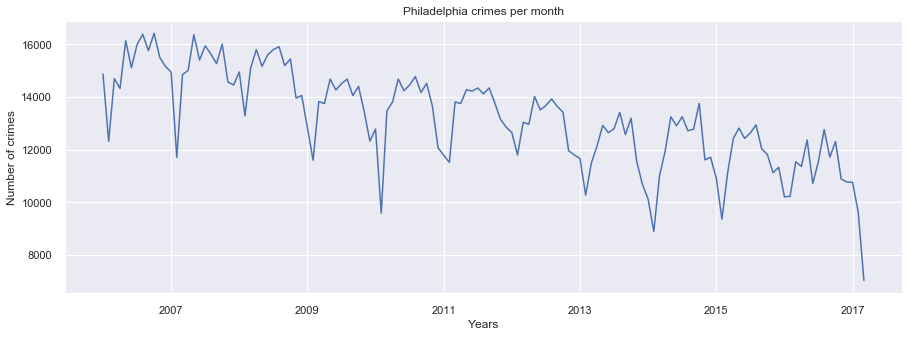

In [162]:
plt.figure(figsize=(15,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Philadelphia crimes per month')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

## Rolling sum of all crimes

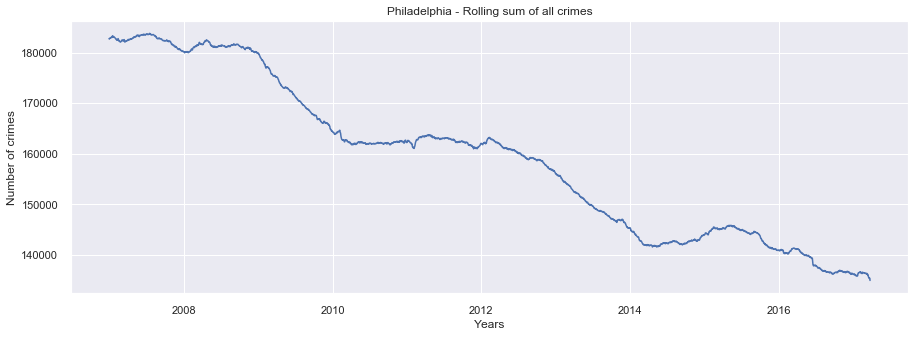

In [163]:
plt.figure(figsize=(15,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Philadelphia - Rolling sum of all crimes')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

## Plot different types of crime (Rolling Sum)

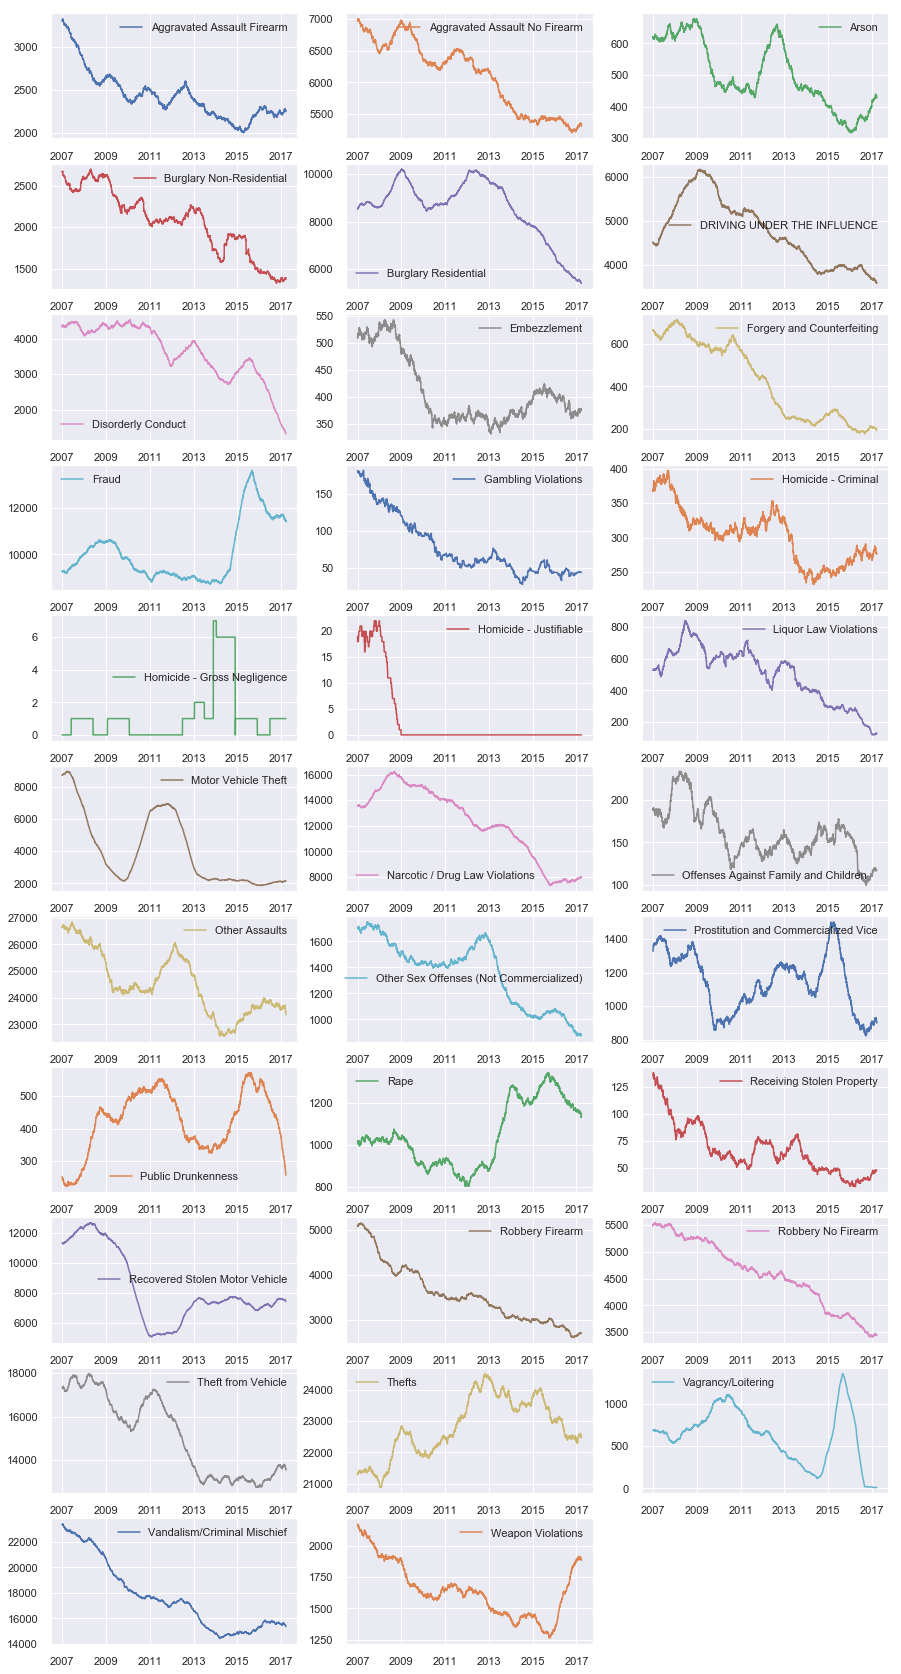

In [164]:
crimes_count_date = crimes.pivot_table('Dc_Key', aggfunc=np.size, columns='Text_General_Code', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## Number of crimes by month of the year

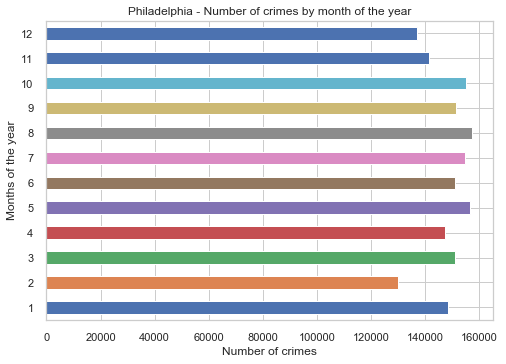

In [220]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Philadelphia - Number of crimes by month of the year')
plt.show()

## Number of crimes by type

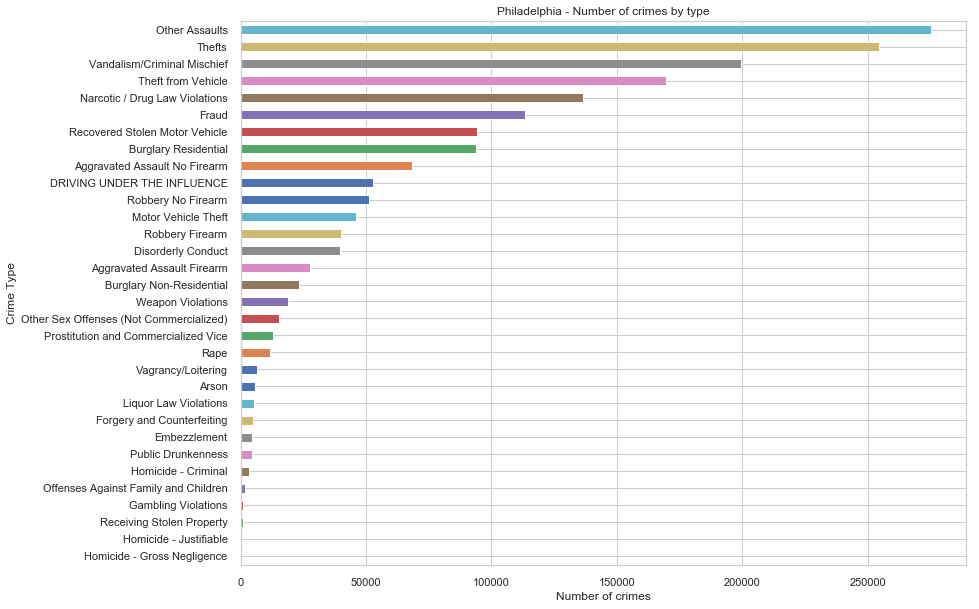

In [221]:
plt.figure(figsize=(13,10))
crimes.groupby([crimes['Text_General_Code']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Philadelphia - Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by Crime Type

Text(0.5,1,'Philadelphia - Hour by Crime Type')

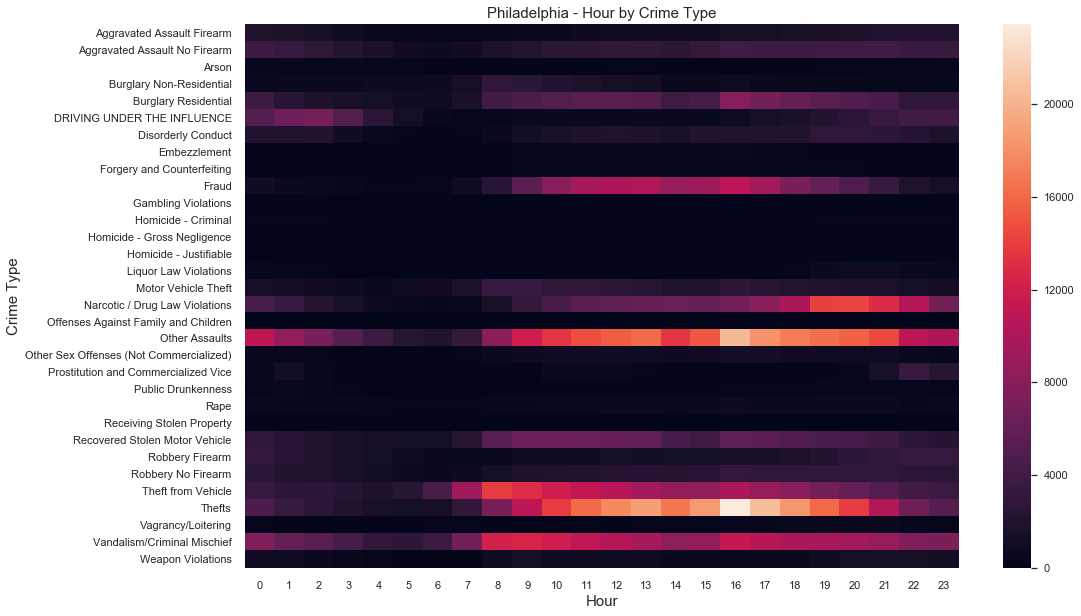

In [229]:
hour_by_type = crimes.pivot_table(values='Dc_Key', index='Text_General_Code', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_type)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Philadelphia - Hour by Crime Type', fontsize=15)

## Number of crimes by Police District

In [168]:
# loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
# desc_to_change = list(crimes['Description'].value_counts()[20:].index)
# # #type_to_change = list(chicago_crimes['Primary Type'].value_counts()[20:].index)

# crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
# crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
# # #chicago_crimes.loc[chicago_crimes['Primary Type'].isin(type_to_change) , chicago_crimes.columns=='Primary Type'] = 'OTHER'

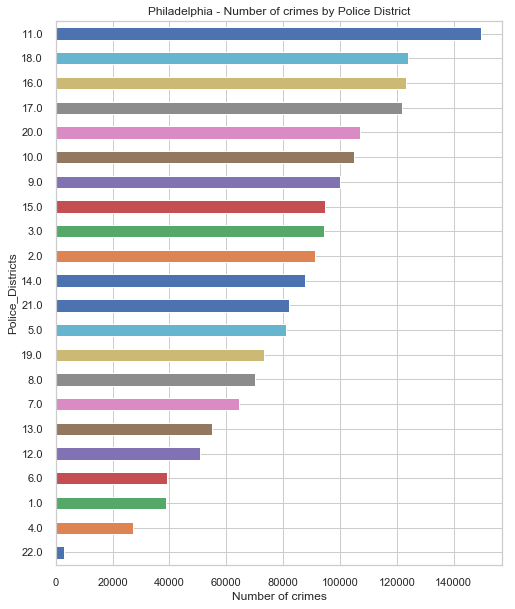

In [223]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Police_Districts']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Philadelphia - Number of crimes by Police District')
plt.ylabel('Police_Districts')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by Police District

Text(0.5,1,'Hour by District/Sector')

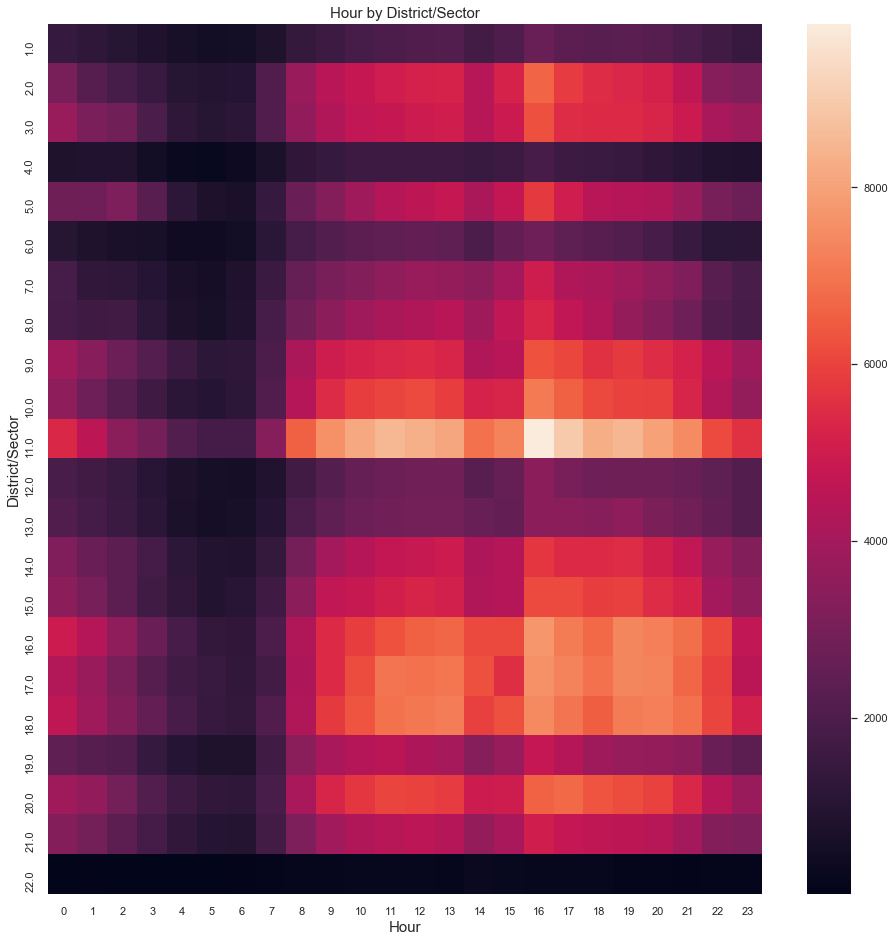

In [170]:
hour_by_location = crimes.pivot_table(values='Dc_Key', index='Police_Districts', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(hour_by_location)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('District/Sector', fontsize=15)
ax.set_title('Hour by District/Sector', fontsize=15)

## Number of crimes by day of the week

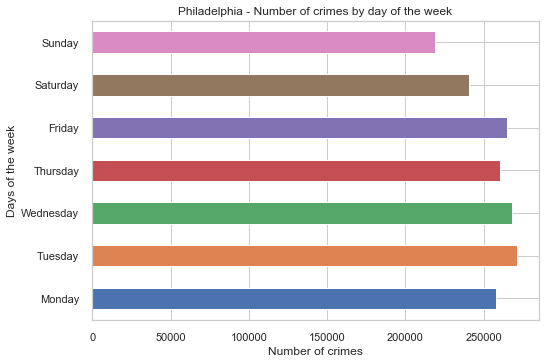

In [222]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Philadelphia - Number of crimes by day of the week')
plt.show()

## Heatmap - Hour by Week

Text(0.5,1,'Philadelphia - Hour by Day of Week')

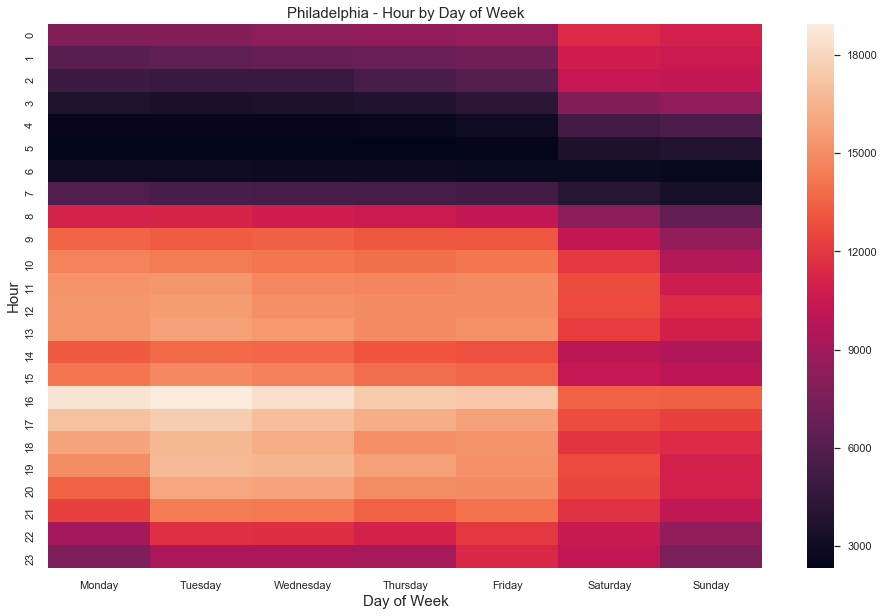

In [228]:
hour_by_week = crimes.pivot_table(values='Dc_Key', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week = hour_by_week[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_week)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Hour', fontsize=15)
ax.set_title('Philadelphia - Hour by Day of Week', fontsize=15)

## Reorder columns according to the the order of days

In [173]:
hour_by_week = hour_by_week[days].T 

## Heatmap - Day of Week by Location

Text(0.5,1,'Philadelphia - Day of Week by Police District')

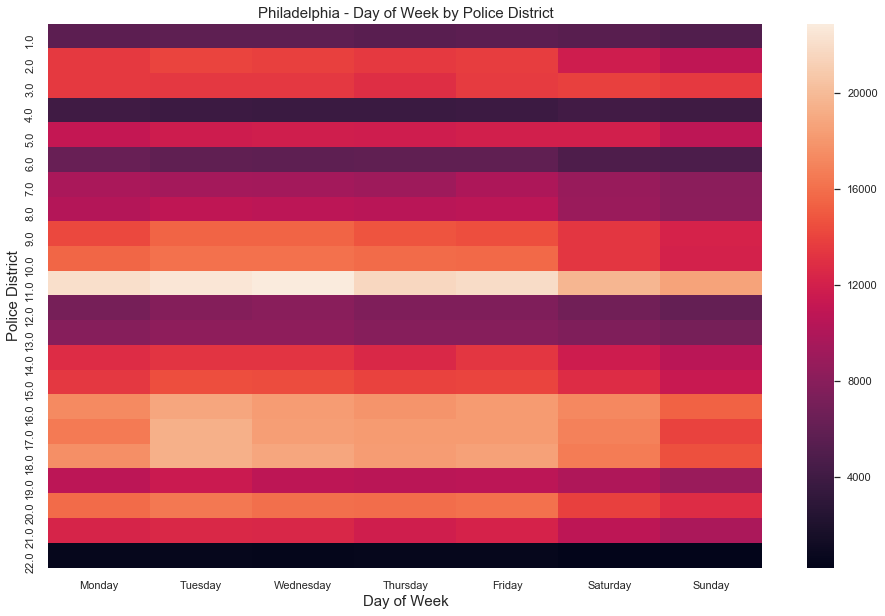

In [227]:
dayofweek_by_location = crimes.pivot_table(values='Dc_Key', index='Police_Districts', columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
dayofweek_by_location = dayofweek_by_location[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_location)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Police District', fontsize=15)
ax.set_title('Philadelphia - Day of Week by Police District', fontsize=15)

## Heatmap - Day of Week by Type

Text(0.5,1,'Day of Week by Crime Type')

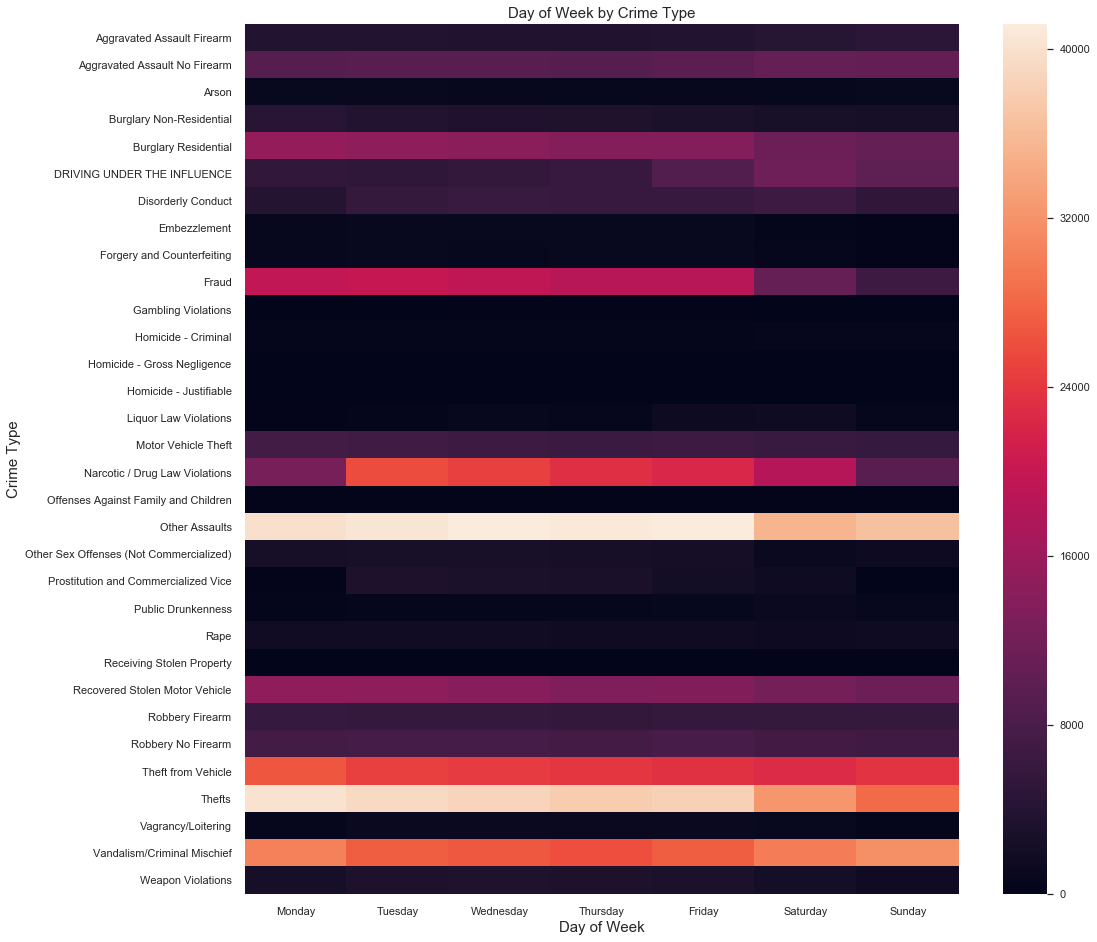

In [175]:
dayofweek_by_type = crimes.pivot_table(values='Dc_Key', index='Text_General_Code', columns=crimes.index.weekday_name, aggfunc = np.size).fillna(0)
dayofweek_by_type=dayofweek_by_type[days]

plt.figure(figsize=(16,16))
ax = sns.heatmap(dayofweek_by_type)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Day of Week by Crime Type', fontsize=15)

## Heatmap - Location by Type

Text(0.5,1,'Police_Districts by Crime Type')

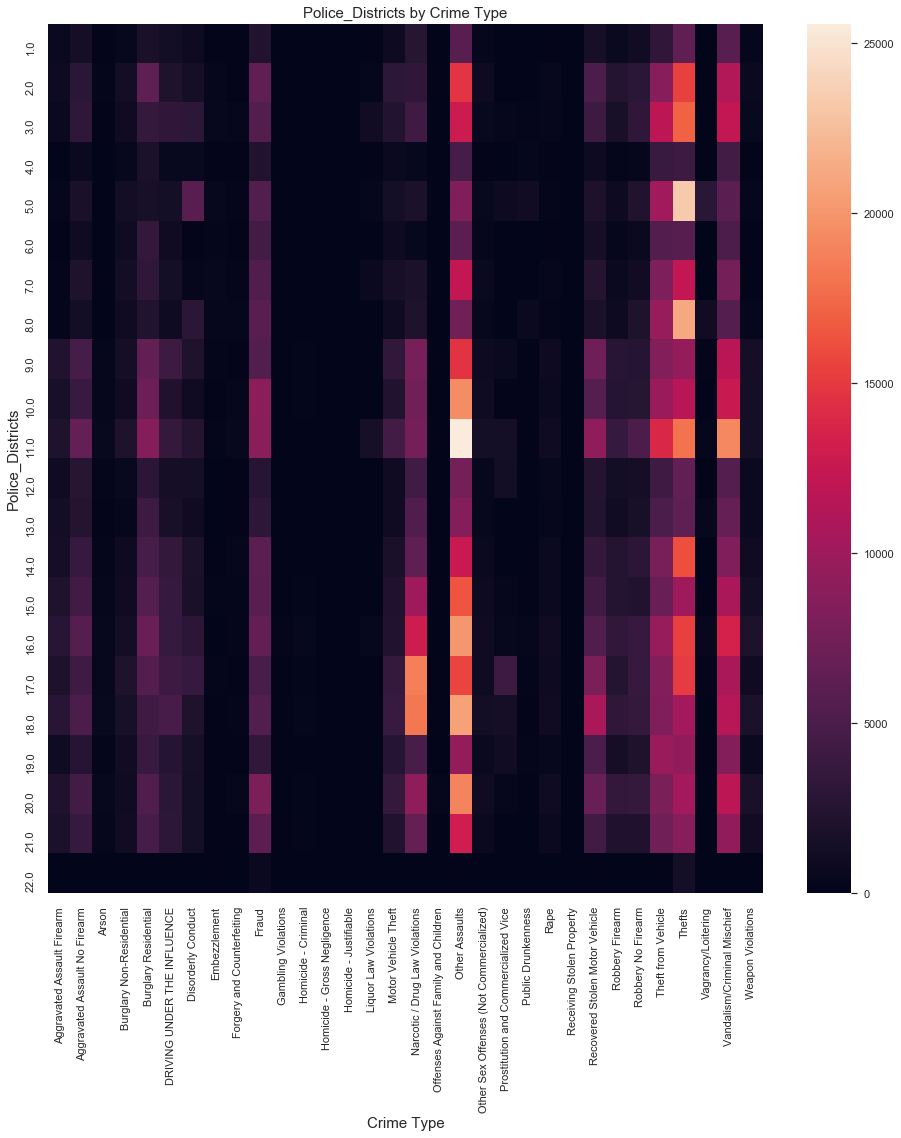

In [176]:
location_by_type  = crimes.pivot_table(values='Dc_Key', index='Police_Districts', columns='Text_General_Code', aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(location_by_type)
ax.set_xlabel('Crime Type', fontsize=15)
ax.set_ylabel('Police_Districts', fontsize=15)
ax.set_title('Police_Districts by Crime Type', fontsize=15)

# Compare Machine Learning Models in Scikit-learn
# --
## View size of dataframe

In [177]:
print(crimes["Dispatch_Date_Time"].shape)
print(crimes["Dc_Key"].shape)
print(crimes["Text_General_Code"].shape)
print(crimes["Police_Districts"].shape)

print(crimes["month"].shape)
print(crimes["day"].shape)
print(crimes["weekday"].shape)
print(crimes["hour"].shape)

(1782686,)
(1782686,)
(1782686,)
(1782686,)
(1782686,)
(1782686,)
(1782686,)
(1782686,)


In [178]:
crimes.head(1)

,Dispatch_Date_Time,Dc_Key,Text_General_Code,Police_Districts,month,day,weekday,hour
Dispatch_Date_Time,,,,,,,,
2009-07-19 01:09:00,2009-07-19 01:09:00,200935061008,Weapon Violations,20.0,7,19,6,1


In [179]:
# Build a new dataframe called 'crimes_learn'
crimes_learn = crimes.loc[:,('month','day','weekday','hour','Text_General_Code','Police_Districts')]
crimes_learn.head(1)

,month,day,weekday,hour,Text_General_Code,Police_Districts
Dispatch_Date_Time,,,,,,
2009-07-19 01:09:00,7,19,6,1,Weapon Violations,20.0


In [180]:
# crime type value count
print('Text_General_Code: ', crimes_learn["Text_General_Code"].value_counts().size)

Text_General_Code:  32


In [181]:
# Serialize Primary Type (Crime type)
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("philadelphia-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(32):
    cell_value_primary_type = sh.cell(i,0).value
    cell_value_serialized_primary_type = sh.cell(i,1).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [182]:
#create new serialized column for crime type
crimes_learn['New_Crime_Code'] = crimes_learn['Text_General_Code'].map(serialized_primary_type_dict)

crimes_learn.head(1)

,month,day,weekday,hour,Text_General_Code,Police_Districts,New_Crime_Code
Dispatch_Date_Time,,,,,,,
2009-07-19 01:09:00,7,19,6,1,Weapon Violations,20.0,17.0


## Value Count - Type of crime 

In [183]:
# Text_General_Code
print('Unique values of New_Crime_Code: ', crimes_learn["New_Crime_Code"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('New_Crime_Code').size().sort_values()

Unique values of New_Crime_Code:  14



New_Crime_Code
17.0     18879
15.0     27638
14.0     39738
13.0     40035
12.0     46062
11.0     51147
9.0      68381
8.0      93975
5.0     136354
4.0     169463
3.0     199280
2.0     254577
1.0     275328
99.0    361829
dtype: int64

# Reindex dataframe

In [184]:
crimes_learn.index = range(len(crimes_learn))

# Reorganize columns and drop some columns

In [185]:
crimes_learn = crimes_learn[['New_Crime_Code','month','day','weekday','hour','Police_Districts']]
crimes_learn.head(2)

,New_Crime_Code,month,day,weekday,hour,Police_Districts
0,17.0,7,19,6,1,20.0
1,2.0,4,25,5,12,13.0


## Drop rows where 'New_Crime_Code' = 99.0
#### This will keep only the crimes we wish to concentrate on or predict location

In [186]:
print('Dataset Shape before drop : ', crimes_learn.shape)
crimes_learn = crimes_learn[crimes_learn['New_Crime_Code'] != 99.0]
print('Dataset Shape after drop: ', crimes_learn.shape)

Dataset Shape before drop :  (1782686, 6)
Dataset Shape after drop:  (1420857, 6)


## Value Count - Type of crime 

In [187]:
# Text_General_Code
print('Unique values of New_Crime_Code: ', crimes_learn["New_Crime_Code"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('New_Crime_Code').size().sort_values()

Unique values of New_Crime_Code:  13



New_Crime_Code
17.0     18879
15.0     27638
14.0     39738
13.0     40035
12.0     46062
11.0     51147
9.0      68381
8.0      93975
5.0     136354
4.0     169463
3.0     199280
2.0     254577
1.0     275328
dtype: int64

In [188]:
crimes_learn.head()

,New_Crime_Code,month,day,weekday,hour,Police_Districts
0,17.0,7,19,6,1,20.0
1,2.0,4,25,5,12,13.0
2,1.0,2,10,1,14,16.0
3,2.0,10,6,1,18,16.0
4,2.0,10,9,4,0,16.0


## Randomly Sample Rows to make dataset smaller

In [189]:
crimes_learn = crimes_learn.sample(n=500000)
crimes_learn.shape

(500000, 6)

## Pairplot

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

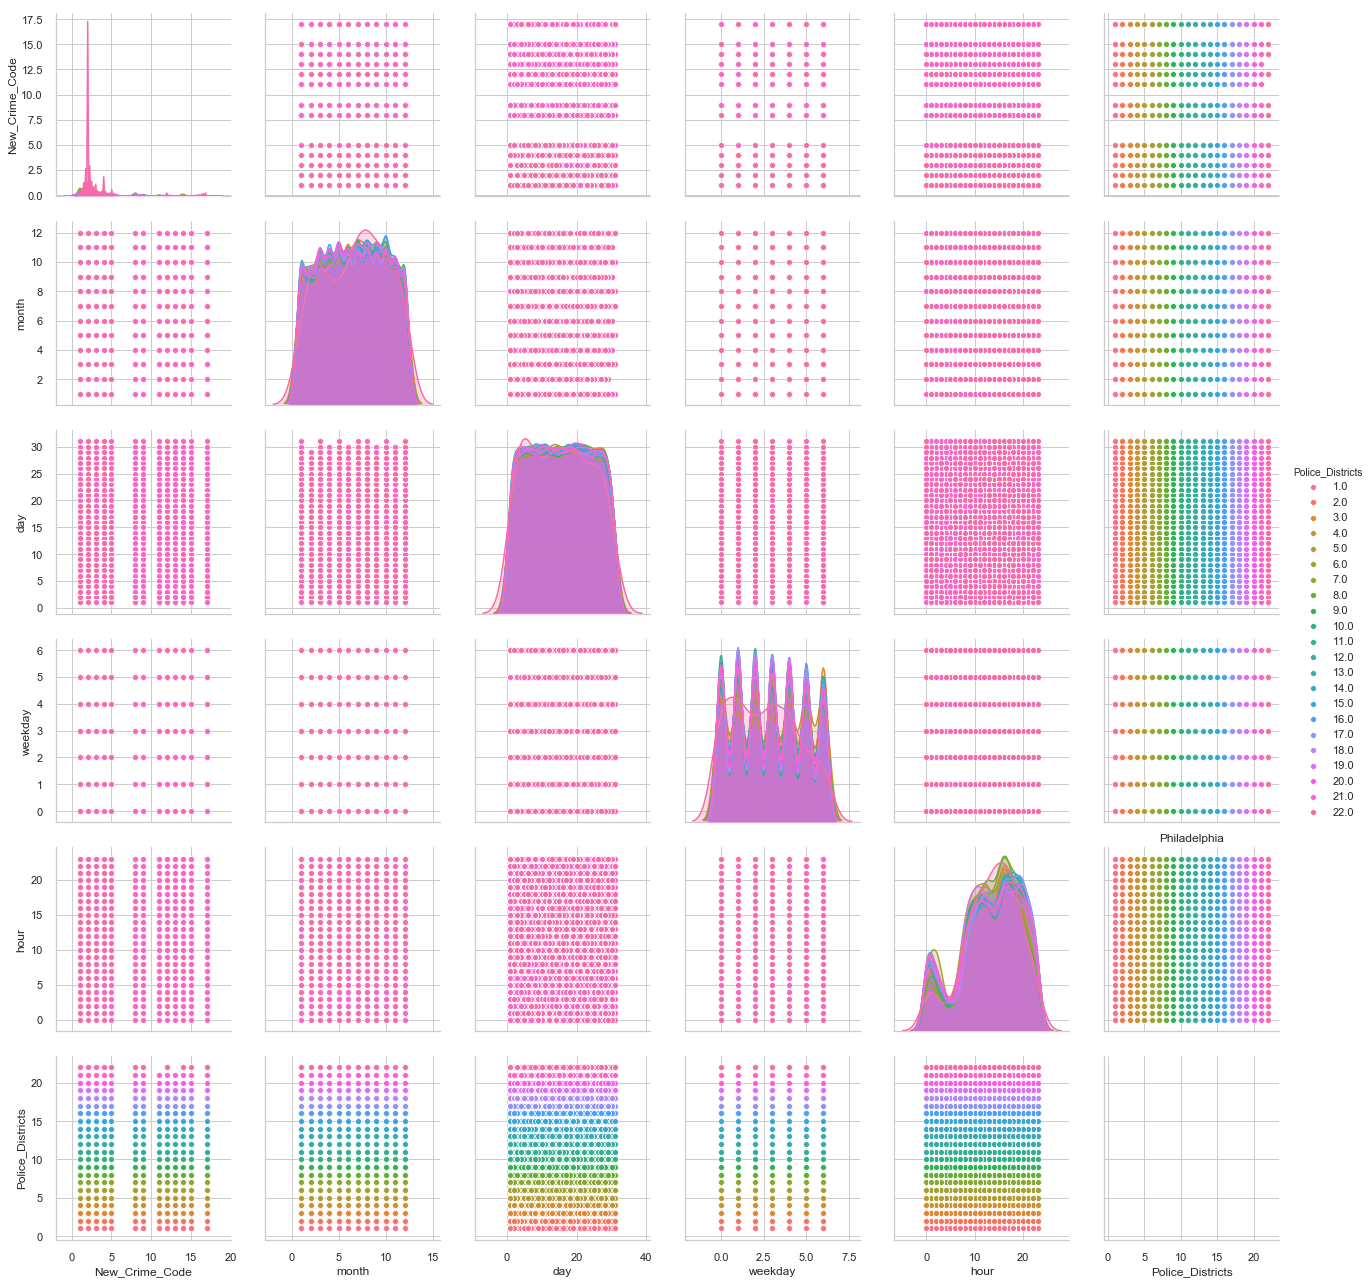

In [190]:
sns.set_style('whitegrid')
sns.pairplot(crimes_learn, hue = 'Police_Districts', height = 3)
plt.title('Philadelphia')
plt.show()

## Univariate analysis

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


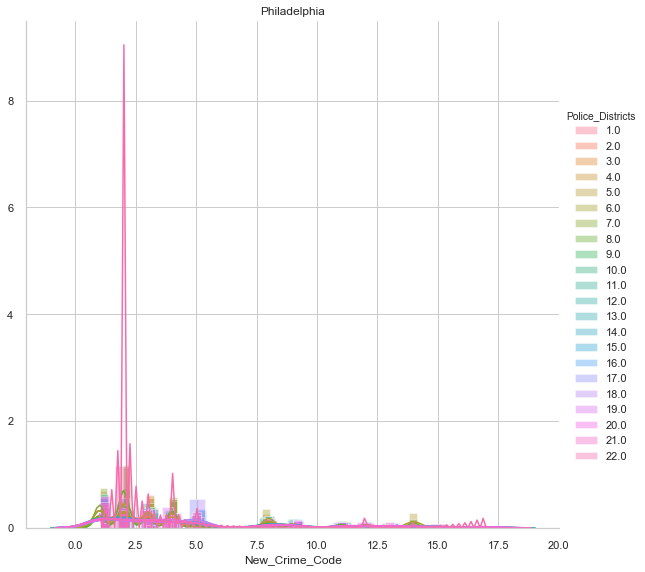

In [191]:
sns.FacetGrid(crimes_learn, hue='Police_Districts',height=8).map(sns.distplot, 'New_Crime_Code').add_legend()
plt.title('Philadelphia')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


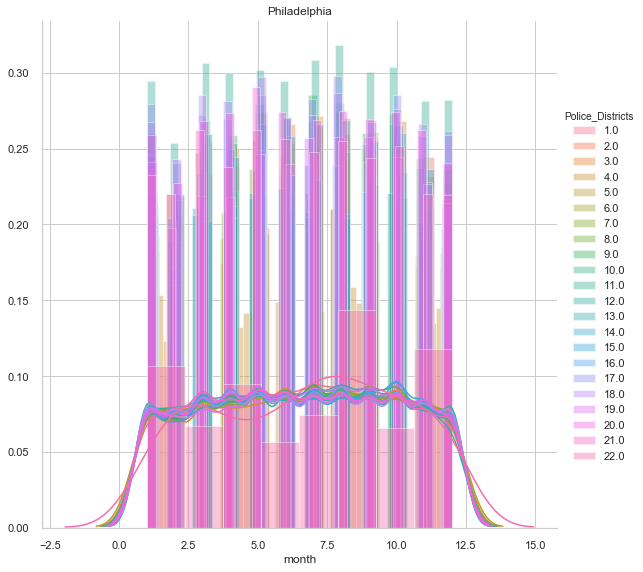

In [192]:
sns.FacetGrid(crimes_learn, hue='Police_Districts',height=8).map(sns.distplot, 'month').add_legend()
plt.title('Philadelphia')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


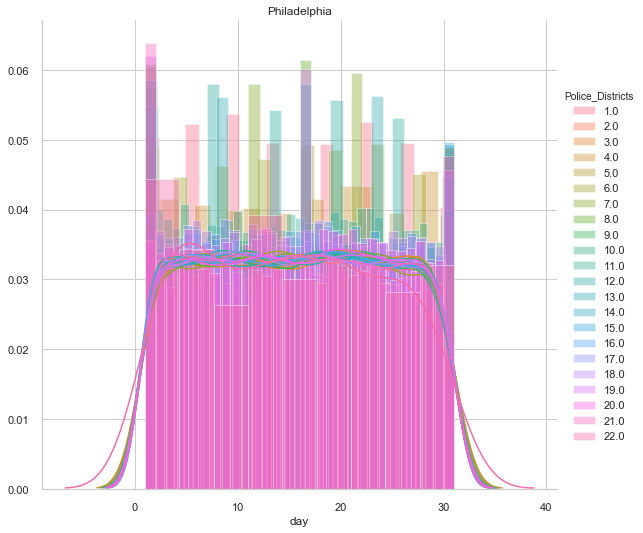

In [193]:
sns.FacetGrid(crimes_learn, hue='Police_Districts',height=8).map(sns.distplot, 'day').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Philadelphia')
plt.show()

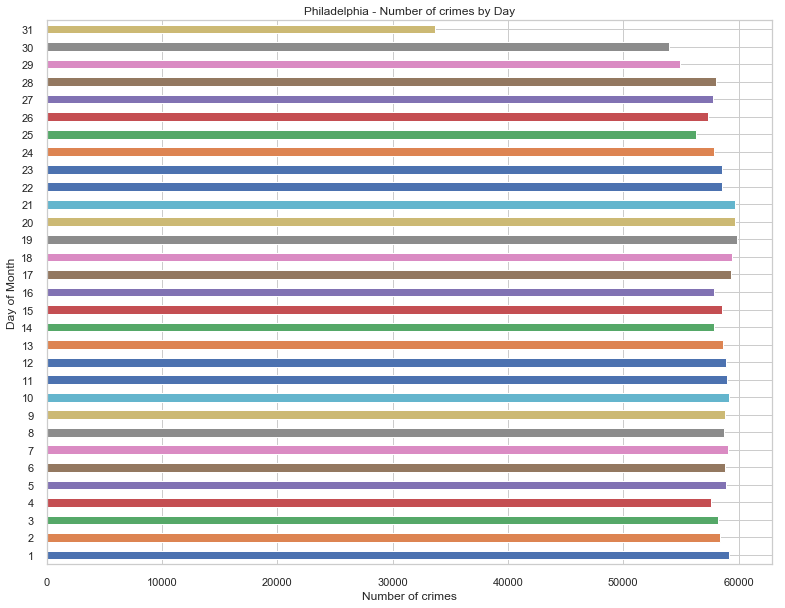

In [225]:
# Number of Crimes by Day
plt.figure(figsize=(13,10))
crimes.groupby([crimes['day']]).size().plot(kind='barh')
plt.title('Philadelphia - Number of crimes by Day')
plt.ylabel('Day of Month')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


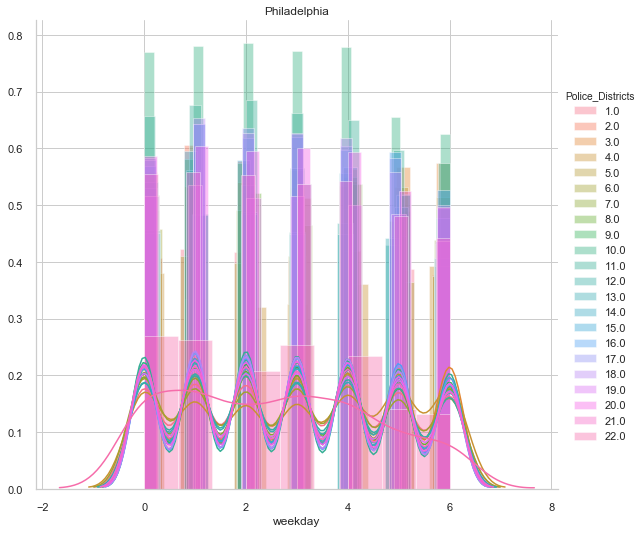

In [194]:
sns.FacetGrid(crimes_learn, hue='Police_Districts',height=8).map(sns.distplot, 'weekday').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Philadelphia')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


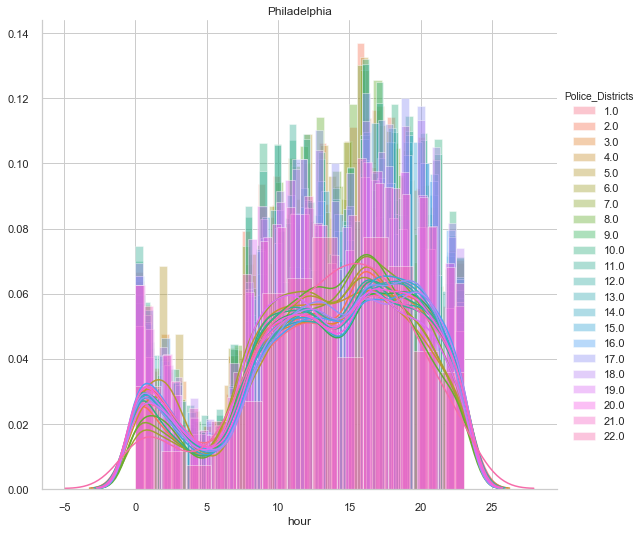

In [195]:
sns.FacetGrid(crimes_learn, hue='Police_Districts',height=8).map(sns.distplot, 'hour').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Philadelphia')
plt.show()

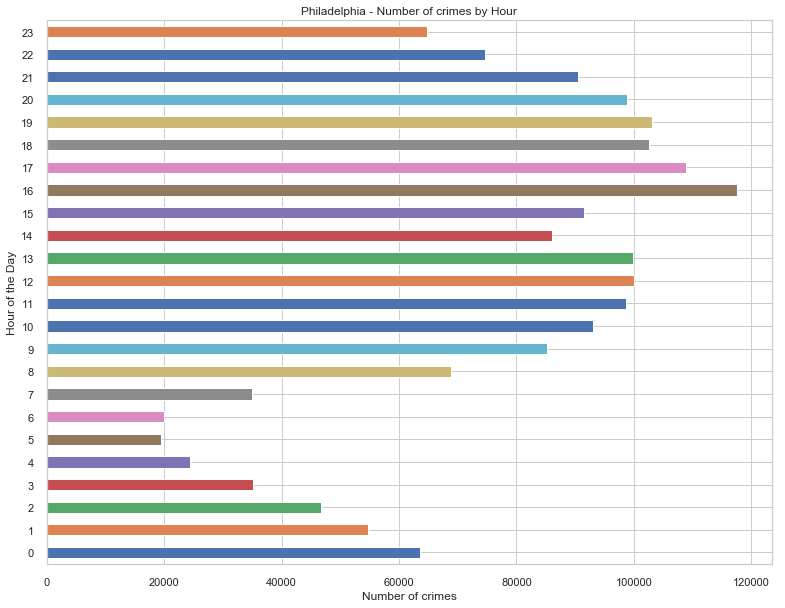

In [226]:
# Number of Crimes by Hour
plt.figure(figsize=(13,10))
crimes.groupby([crimes['hour']]).size().plot(kind='barh')
plt.title('Philadelphia - Number of crimes by Hour')
plt.ylabel('Hour of the Day')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


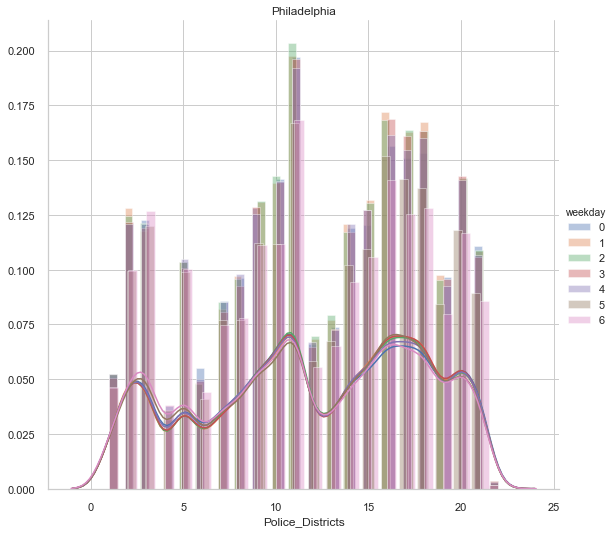

In [196]:
sns.FacetGrid(crimes_learn, hue='weekday',height=8).map(sns.distplot, 'Police_Districts').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Philadelphia')
plt.show()

## Drop 'day' column

In [197]:
crimes_learn = crimes_learn[['New_Crime_Code', 'month', 'weekday', 'hour',
       'Police_Districts']]
crimes_learn.head(2)

,New_Crime_Code,month,weekday,hour,Police_Districts
1390392,1.0,4,1,16,11.0
841790,9.0,11,1,15,14.0


In [224]:
# Value Counts 

print('New_Crime_Code: ', crimes_learn["New_Crime_Code"].value_counts().size)
print()

print('month: ', crimes_learn["month"].value_counts().size)
print()

print('weekday: ', crimes_learn["weekday"].value_counts().size)
print()

print('hour: ', crimes_learn["hour"].value_counts().size)
print()

print('Police_Districts: ', crimes_learn["Police_Districts"].value_counts().size)

New_Crime_Code:  13

month:  12

weekday:  7

hour:  24

Police_Districts:  22


In [198]:
crimes_learn.columns

Index(['New_Crime_Code', 'month', 'weekday', 'hour', 'Police_Districts'], dtype='object')

# Modeling with scikit-learn

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle

## Split the dataset into a training set and a testing set

In [200]:
X = crimes_learn.drop(['Police_Districts'], axis=1)
y = crimes_learn['Police_Districts']
print(X.head(2))
print(X.shape,'\n')
print(y.head(2))
print(y.shape)

         New_Crime_Code  month  weekday  hour
1390392             1.0      4        1    16
841790              9.0     11        1    15
(500000, 4) 

1390392    11.0
841790     14.0
Name: Police_Districts, dtype: float64
(500000,)


## Inspired by: 
#### https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [201]:
# create a Validation Dataset
X = crimes_learn.drop(['Police_Districts'], axis=1)
Y = crimes_learn['Police_Districts']
print(X.head(2))
print("X.shape ", X.shape,'\n')
print(Y.head(2))
print("Y.shape ", Y.shape)

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

         New_Crime_Code  month  weekday  hour
1390392             1.0      4        1    16
841790              9.0     11        1    15
X.shape  (500000, 4) 

1390392    11.0
841790     14.0
Name: Police_Districts, dtype: float64
Y.shape  (500000,)


In [202]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [203]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Let’s evaluate 6 different algorithms:

In [204]:
# Build Models
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\lo

LR: 0.083422 (0.001007)
LDA: 0.083325 (0.000983)
KNN: 0.060397 (0.001123)
CART: 0.075150 (0.001149)
NB: 0.083143 (0.001079)


## Compare Algorithms

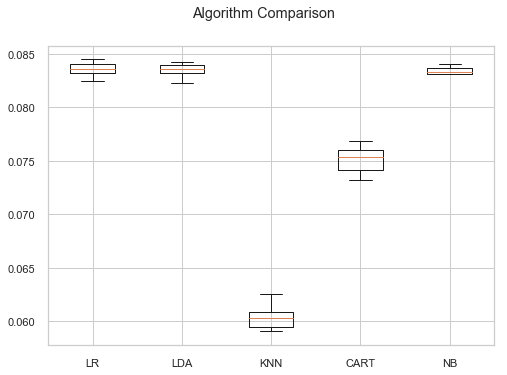

In [205]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions

In [206]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("KNeighborsClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier
0.06193
[[ 188  350  293   55  198   57  119  100  111  127  155   26   32   57
    56  102   91   85   29   58   41    0]
 [ 377  877  655  150  434  174  246  210  266  263  402   44   61  130
   121  171  165  152   61  128   78    0]
 [ 411  812  754  145  481  141  236  219  300  275  362   66   64  135
   137  197  173  176   64  123   84    0]
 [ 123  234  205   52  145   42   75   82   80   76  109   15   20   39
    47   48   40   53   34   34   23    0]
 [ 308  683  652  128  614  116  216  277  196  163  258   40   45  106
    90  153  131  126   85   91   55    0]
 [ 173  334  266   63  167   75  111   86  126  106  156   25   24   61
    58   54   58   57   41   58   41    0]
 [ 237  550  457  115  295  112  194  157  201  189  247   40   36   84
    94  121  122  136   35   93   66    1]
 [ 309  640  491  112  468  107  194  250  189  175  242   27   43  121
    76  151  128  109   50   84   50    1]
 [ 408  824  622  124  368  151  247  198  338  312

In [207]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print("LogisticRegression")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
0.08437
[[   0    0    0    0    0    0    0    0    0    0 2230    0    0    0
     0    5   12   83    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 4971    0    0    0
     0    7   29  158    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 5156    0    0    0
     0    3   43  153    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1538    0    0    0
     0    1    2   35    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 4252    0    0    0
     0    4   26  251    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 2107    0    0    0
     0    0    4   29    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3529    0    0    0
     0    0    9   44    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3892    0    0    0
     0    1   17  107    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 5

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [208]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print("LinearDiscriminantAnalysis")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis
0.08468
[[   0    0    0    0    0    0    0    0    0    0 2217    0    0    0
     0    2   15   96    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 4922    0    0    0
     0    7   31  205    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 5119    0    0    0
     0    5   47  184    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1534    0    0    0
     0    0    3   39    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 4219    0    0    0
     0    2   24  288    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 2102    0    0    0
     0    0    4   34    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3519    0    0    0
     0    0    9   54    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3854    0    0    0
     0    1   17  145    0    0    0    0]
 [   0    0    0    0    0    0    0    0    

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [209]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)

print("DecisionTreeClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

DecisionTreeClassifier
0.07657
[[  52  178  191   11  203   23   66  139  150  161  373   15   22   79
    96  149  155  128   35   72   32    0]
 [  77  509  480   26  440   49  153  278  291  362  844   38   37  179
   190  341  293  264   66  187   61    0]
 [  87  482  593   31  519   46  147  305  298  341  791   44   38  150
   219  375  312  268   82  166   61    0]
 [  28  137  154   10  124   12   59   96  103  126  264   15    8   39
    52   98   59   93   38   40   21    0]
 [  79  374  501   13  805   26  128  447  160  235  578   25   25  159
   131  229  217  166   73  120   42    0]
 [  31  180  176   18  187   26   76  126  123  160  374   18   14   88
    68  138   94   97   34   70   42    0]
 [  35  276  336   18  343   56  122  208  182  250  622   25   32  110
   128  242  176  206   41  119   55    0]
 [  59  343  413   18  572   34  131  417  180  230  504   23   24  164
   100  231  212  142   66  120   34    0]
 [ 113  438  439   32  364   51  158  222  368  4

In [210]:
# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print("GaussianNB")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

GaussianNB
0.08492
[[   0    0    0    0    0    0    0    0    9    0 2092    0    0    0
     0   40    0  186    0    3    0    0]
 [   0    0    0    0    0    0    0    0    6    0 4639    0    0    0
     0   90    0  420    0   10    0    0]
 [   0    0    0    0    0    0    0    0    9    0 4837    0    0    0
     0  142    0  364    0    3    0    0]
 [   0    0    0    0    0    0    0    0    1    0 1468    0    0    0
     0   29    0   78    0    0    0    0]
 [   0    0    0    0    0    0    0    0    6    0 3939    0    0    0
     0  105    0  482    0    1    0    0]
 [   0    0    0    0    0    0    0    0    1    0 2043    0    0    0
     0   21    0   73    0    2    0    0]
 [   0    0    0    0    0    0    0    0    1    0 3421    0    0    0
     0   32    0  127    0    1    0    0]
 [   0    0    0    0    0    0    0    0    1    0 3657    0    0    0
     0   75    0  280    0    4    0    0]
 [   0    0    0    0    0    0    0    0   17    0 4706    0

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [211]:
# # Split the dataset into a training set and a testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print()
# print(y_train.shape)
# print(y_test.shape)

## Logistic Regression

In [212]:
# # train the model on the training set
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [213]:
# # save the model to disk (Pickle)
# filename = 'finalized_Philadelphia_LR_model.sav'
# pickle.dump(logreg, open(filename, 'wb'))

## Accuracy score

In [214]:
# # make predictions on the training set
# y_pred = logreg.predict(X_test)

# # compare actual response values (y_test) with predicted response values (y_pred)
# print(metrics.accuracy_score(y_test, y_pred))

## K Nearest Neighbors - Optimize k value

In [215]:
# k_range = list(range(1,26))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

## Plot the relationship between k and testing accuracy

In [216]:
# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

# Choosing KNN to Model Ward Prediction with k = ?????
### After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [217]:
# # instantiate the model with the best known parameters
# knn = KNeighborsClassifier(n_neighbors=12)

# # train the model with X and y (not X_train and y_train)
# knn.fit(X, y)

# #PICKLE
# # save the model to disk (pickle)
# filename = 'finalized_Philadelphia_KNN_model.sav'
# pickle.dump(knn, open(filename, 'wb'))

## Make prediction on out-of-sample data

In [218]:
# # make a prediction for an example of an out-of-sample observation
# # predict Ward from knn.predict([['New_Crime_Code','month','weekday','hour','Police_Districts']])
# knn.predict([[17.0,3,5,12]])

In [219]:
# knn.predict([[2.0,2,2,23]])